Digit Clustering with KMeans Algorithm - Unsupervised Learning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# set() function - to configure the aesthetics of the plots by setting the same default...
# ... themes for multiple graphs

In [57]:
# Loading the dataset from sklearn
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
# Getting the input and output data
# Output data not used in training
digits = load_digits()
X = digits.data
y = digits.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [34]:
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [35]:
# We have 10 classes (0 to 9)
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=10, n_init=10, random_state=0)

In [36]:
# Predicting with testing data
clusters = kmeans.predict(X_test)

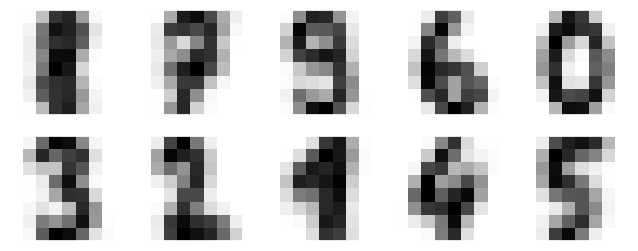

In [37]:
# Create a grid of subplots with 2 rows and 5 columns (Total 10 plots for 10 numbers)
# figsize >> size of each subplot
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

# In the image classification, the cluster center is 64 x 64 dimension image and not just a number
# Reshaping the array into 10 x 8 x 8 >> 10 images of 8 x 8 size
# 10 images to plot 10 numbers in subplots
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

# Converting each image into 1 single dimensional array by flattening
# xticks, yticks are the numbers on the axis when the graphs are plotted.
# ... Here, these numbers are not required. Hence, they are emptied using [].
# center represents the center of each clusters.
# interpolation = 'nearest' for pixelated image instead of blurry.
# cmap for binary image.
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [38]:
# To assign the most frequent true label of the digit to each cluster
# For example, in 1 cluster, there are 95 images of digit 5 and 5 images of digit 6,
# ... the cluster is labelled as 5.

# mode function - to find 'most frequently occuring value'

from scipy.stats import mode

# Initialize the array of the same size as clusters but filled with 0.
# 'clusters' is predicted on X_test so it has the size of X_test
# Using y_test to match the size
labels = np.zeros_like(clusters)

# Creating a boolean mask for each clusters.
# Iteration-1:
# - mask True for cluster 0
# - Find the cluster with most frequently repeating 0 number
# - Give the label 0 to that cluster
# ... repeat same till number 9
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_test[mask])[0]

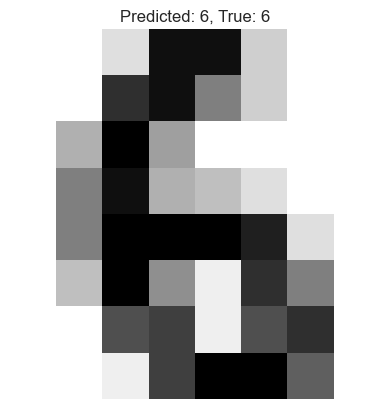

In [71]:
random_idx = np.random.randint(len(X_test))
random_image = X_test[random_idx].reshape(8, 8)  # Reshape it to 8x8 to plot
true_label = y_test[random_idx]  # True label for reference

# Predict the cluster for this image
predicted_cluster = kmeans.predict([X_test[random_idx]])[0]
assigned_label = labels[random_idx]  # The label assigned to the cluster

# Plot the image and label it with the predicted cluster
plt.imshow(random_image, cmap=plt.cm.gray_r)
plt.title(f"Predicted: {assigned_label}, True: {true_label}")
plt.axis('off')  # Hide the axis
plt.show()

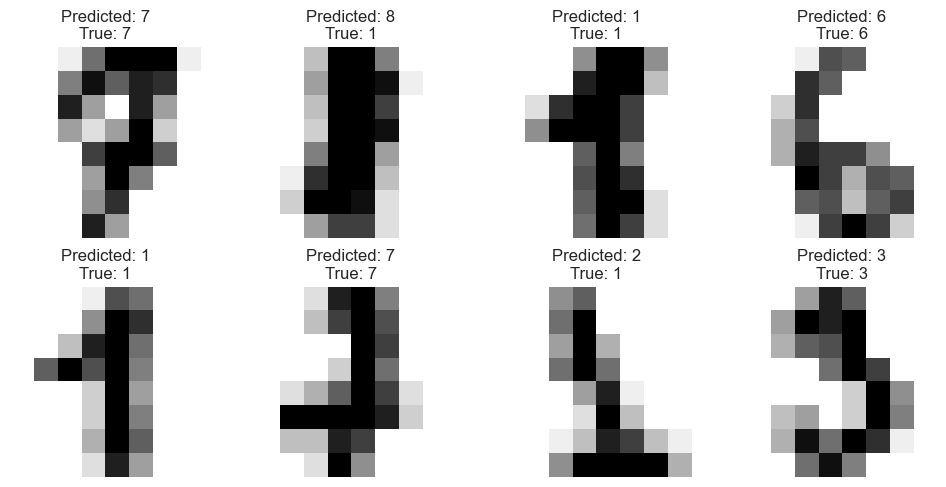

In [74]:
# Set up a grid of plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))

# Randomly select 8 different indices
random_indices = np.random.choice(len(X_test), 8, replace=False)

for ax, idx in zip(axes.flat, random_indices):
    # Select and reshape the random image
    random_image = X_test[idx].reshape(8, 8)
    true_label = y_test[idx]  # True label for reference

    # Predict the cluster for this image
    predicted_cluster = kmeans.predict([X_test[idx]])[0]
    assigned_label = labels[idx]  # The label assigned to the cluster

    # Plot the image and label it with the predicted cluster
    ax.imshow(random_image, cmap=plt.cm.gray_r)
    ax.set_title(f"Predicted: {assigned_label}\nTrue: {true_label}")
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

In [58]:
accuracy = accuracy_score(y_test, labels)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 81.39%


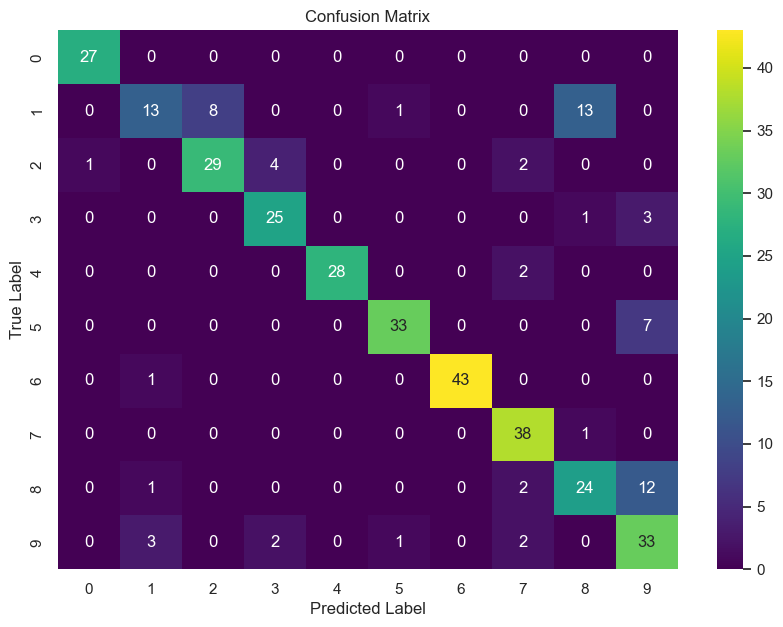

In [73]:
conf_matrix = confusion_matrix(y_test, labels)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()